In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [48]:
data_used = 'LSTM_01_71_02'
model_name = data_used + "_0001"

In [49]:
# path = './model/' + data_used + '/data'

# if not os.path.isfile(path + '/merge.csv'):
#     print("Read from concat_csv.txt")
#     df1 = pd.read_csv( path + '/nothing/concat_csv.txt', header=None)
#     df2 = pd.read_csv( path + '/passing/concat_csv.txt', header=None)
#     df3 = pd.read_csv( path + '/touching/concat_csv.txt', header=None)
#     df = df1.append(df2)
#     df = df.append(df3)
#     df = df.reset_index(drop=True)
#     print("Write merge.csv")
#     df.to_csv( path + '/merge.csv', header=None, index=None)
#     print("Done")
# else:
#     print("Read from merge.csv")
#     df = pd.read_csv( path + '/merge.csv', header=None)

In [50]:
df = pd.read_csv("./train_data_UU.csv", header=None)

In [51]:
print("total shape + label:", df.shape)

total shape + label: (953, 301)


In [52]:
df.replace('a', 'nothing', inplace=True)
df.replace('b', 'passing', inplace=True)
df.replace('c', 'touching', inplace=True)

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,819,819,818,819,820,820,818,819,819,817,...,818,817,818,818,818,816,818,818,815,nothing
1,820,820,818,818,819,819,817,818,819,816,...,808,807,806,807,807,807,810,810,807,nothing
2,815,817,817,814,817,817,815,815,816,816,...,814,815,811,814,815,814,814,815,815,nothing
3,816,817,817,816,817,817,814,816,817,815,...,815,815,813,816,816,813,816,816,814,nothing
4,816,816,816,813,816,816,815,817,817,817,...,814,814,811,814,815,813,814,815,816,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,825,825,818,823,824,820,822,822,822,819,...,971,965,970,970,964,969,968,967,966,touching
949,790,781,779,778,770,765,764,755,749,748,...,959,961,960,954,959,958,954,958,958,touching
950,708,703,703,694,686,686,688,679,676,677,...,949,949,948,946,947,946,940,945,945,touching
951,652,644,641,644,635,630,633,629,622,627,...,934,939,938,933,936,936,935,933,934,touching


In [54]:
# 平均切分各個標籤至train test中


TRAIN_SET_RATE = 0.7  # Rate to seperate train set and test set

labelA =  df[df.iloc[:, -1] == 'nothing']
labelB =  df[df.iloc[:, -1] == 'passing']
labelC =  df[df.iloc[:, -1] == 'touching']
assert len(labelA) + len(labelB) + len(labelC) == len(df)
print("[ Labels ]")
print("labelA shape:", labelA.shape)
print("labelB shape:", labelB.shape)
print("labelC shape:", labelC.shape)
print()

sfA = shuffle(labelA)
trainA, testA = sfA[:int(len(sfA) * TRAIN_SET_RATE)], sfA[int(len(sfA) * TRAIN_SET_RATE):]
sfB = shuffle(labelB)
trainB, testB = sfB[:int(len(sfB) * TRAIN_SET_RATE)], sfB[int(len(sfB) * TRAIN_SET_RATE):]
sfC = shuffle(labelC)
trainC, testC = sfC[:int(len(sfC) * TRAIN_SET_RATE)], sfC[int(len(sfC) * TRAIN_SET_RATE):]
assert len(testA) + len(trainA) == len(labelA)
assert len(testB) + len(trainB) == len(labelB)
assert len(testC) + len(trainC) == len(labelC)
print("[ Labels in Train & Test sets ]")
print("trainA shape:", trainA.shape, ", testA shape:", testA.shape)
print("trainB shape:", trainB.shape, ", testB shape:", testB.shape)
print("trainC shape:", trainC.shape, ", testC shape:", testC.shape)
print()

train_set = pd.concat([trainA, trainB, trainC])
train_set = shuffle(train_set)
test_set = pd.concat([testA, testB, testC])
test_set = shuffle(test_set)
assert len(train_set) + len(test_set) == len(df)
print("[ Train & Test sets ]")
print("train set:", len(train_set), ", test set:", len(test_set))
print()
    
x_train, y_train = train_set.iloc[:, 0:-1], train_set.iloc[:, -1]
x_test, y_test = test_set.iloc[:, 0:-1], test_set.iloc[:, -1]

[ Labels ]
labelA shape: (327, 301)
labelB shape: (312, 301)
labelC shape: (314, 301)

[ Labels in Train & Test sets ]
trainA shape: (228, 301) , testA shape: (99, 301)
trainB shape: (218, 301) , testB shape: (94, 301)
trainC shape: (219, 301) , testC shape: (95, 301)

[ Train & Test sets ]
train set: 665 , test set: 288



In [55]:
LABELS = ['nothing', 'passing', 'touching']

# LabelEncoder
le = LabelEncoder()
le.fit(LABELS)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Standardize
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# reverse
# le.inverse_transform

In [56]:
epochs = 100
batch_size = 15
verbose = 0  # verbose : 0, 1或2。日誌顯示模式。0 =安靜模式, 1 =進度條, 2 =每輪一行。

time_step = 1
feature_dim = x_train.shape[1]

# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.values.reshape((x_train.shape[0], time_step, x_train.shape[1]))
x_test = x_test.values.reshape((x_test.shape[0], time_step, x_test.shape[1]))
print("[ Reshape ]")
print("train X:", x_train.shape, ", train Y:", y_train.shape)
print("test X:", x_test.shape, ", test Y:", y_test.shape)


model = Sequential()
model.add(LSTM(64, input_shape=(time_step, feature_dim)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # out_layer
model.summary()


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# score = model.evaluate(x_test, y_test, batch_size=batch_size)



# Model_based Sample
# def RNN(): 
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = LSTM(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(279,name='out_layer')(layer) # 最後一層參數值為類別數
#     layer = Activation('softmax')(layer) #二元分類是'sigmoid'，多元分類上修改為'softmax'
#     model = Model(inputs=inputs,outputs=layer)
#     return model
# model = RNN()
# model.summary()
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer=RMSprop(),metrics = ['accuracy'])

# # train model
# model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
#           validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])



[ Reshape ]
train X: (665, 1, 300) , train Y: (665,)
test X: (288, 1, 300) , test Y: (288,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 110,851
Trainable params: 110,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/100
45/45 [==============================] - 2s 11ms/step - loss: 1.1096 - accuracy: 0.3654 - val_loss: 1.1064 - val_accuracy: 0.3438
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1300 - accuracy: 0.3143 - val_loss: 1.0994 - val_accuracy: 0.3299
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1356 - accuracy: 0.3128 - val_loss: 1.1016 - val_accuracy: 0.3299
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1212 - accuracy: 0.3263 - val_loss: 1.1052 - val_accuracy: 0.3438
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1178 - accuracy: 0.3248 - val_loss: 1.1021 - val_accuracy: 0.3299
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1060 - accuracy: 0.3368 - val_loss: 1.1068 - val_accuracy: 0.3438
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1227 - accuracy: 0.3248 - val_loss: 1.1046 - val_accuracy: 0.3438
Epoch 8/100


Epoch 59/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1003 - accuracy: 0.3368 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.3308 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1023 - accuracy: 0.3398 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 62/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1042 - accuracy: 0.3068 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1006 - accuracy: 0.3383 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.3173 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 65/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.3278 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 

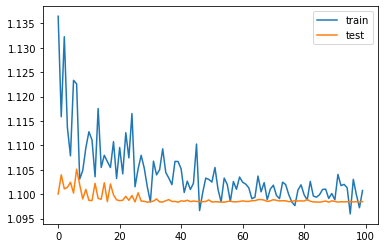

In [24]:

# plot history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

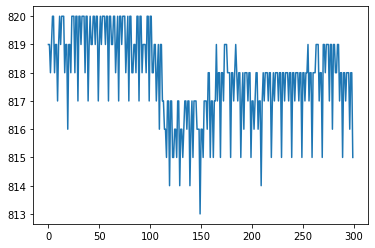

Press Enter to continue...0


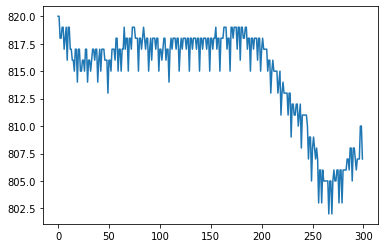

Press Enter to continue...1


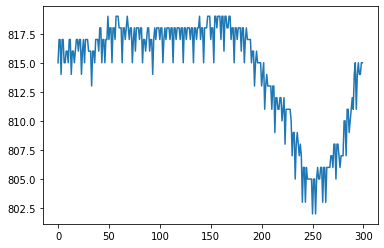

Press Enter to continue...2


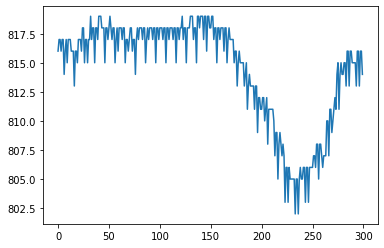

Press Enter to continue...3


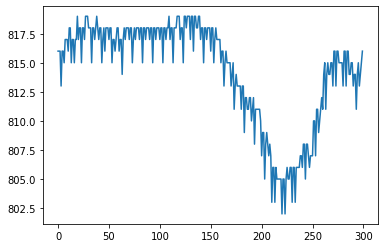

Press Enter to continue...4


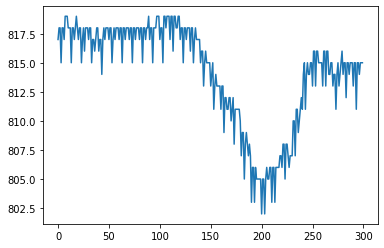

Press Enter to continue...5


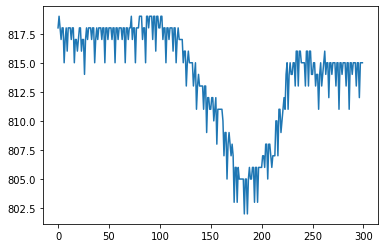

Press Enter to continue...6


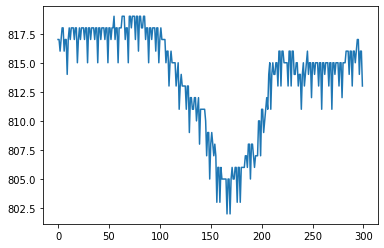

Press Enter to continue...7


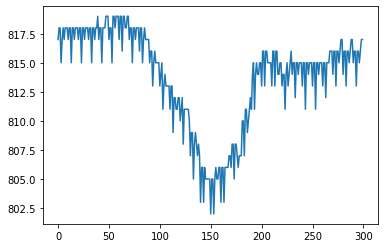

Press Enter to continue...8


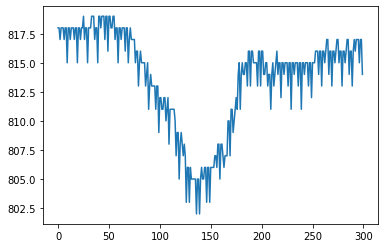

Press Enter to continue...9


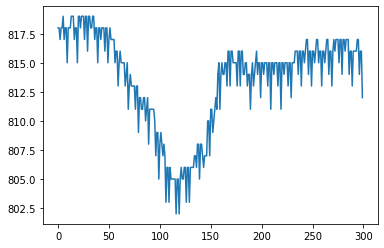

Press Enter to continue...10


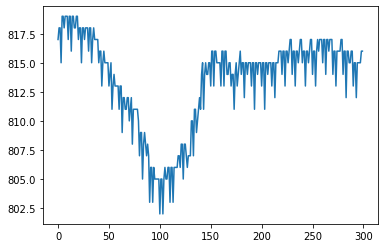

Press Enter to continue...11


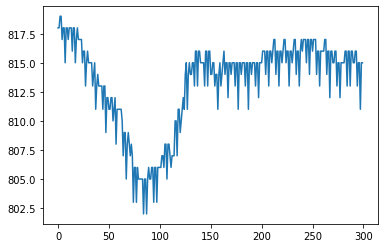

Press Enter to continue...12


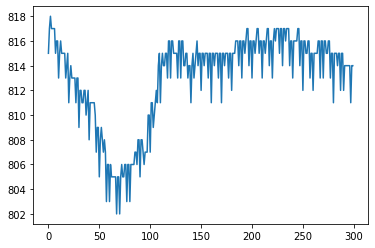

Press Enter to continue...13


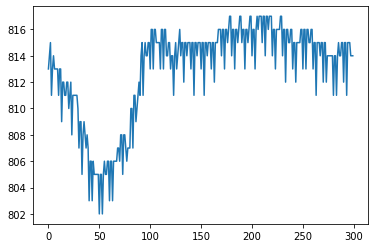

Press Enter to continue...14


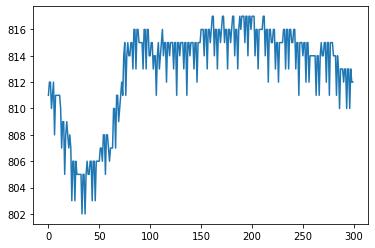

Press Enter to continue...15


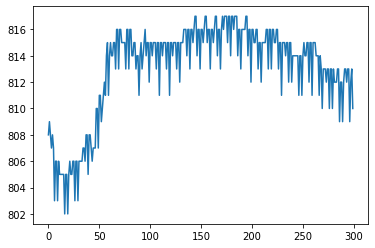

Press Enter to continue...16


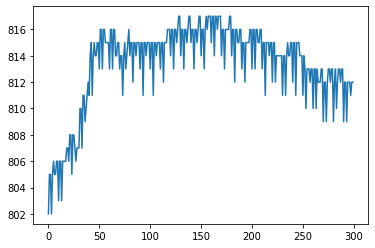

Press Enter to continue...17


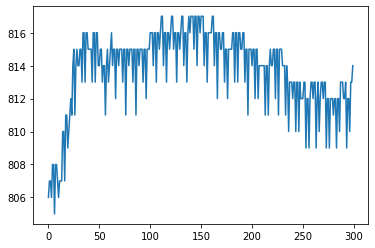

Press Enter to continue...18


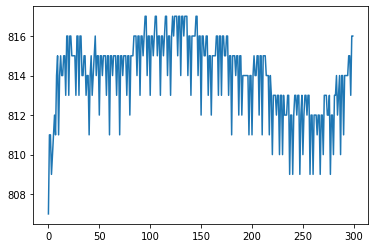

Press Enter to continue...19


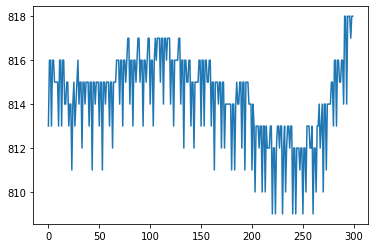

Press Enter to continue...20


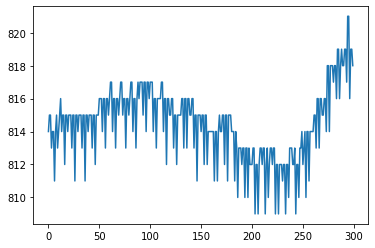

Press Enter to continue...21


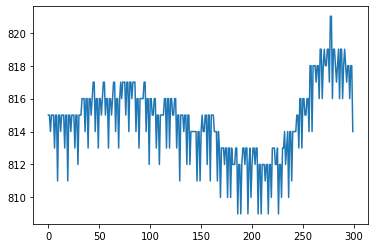

Press Enter to continue...22


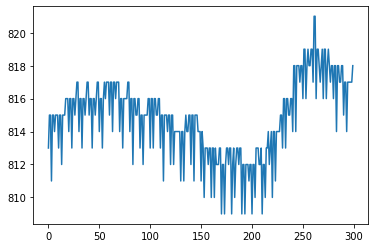

Press Enter to continue...23


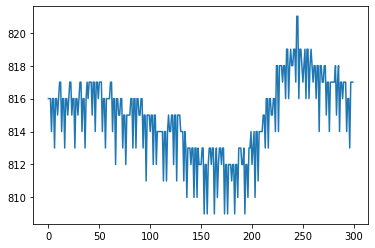

Press Enter to continue...24


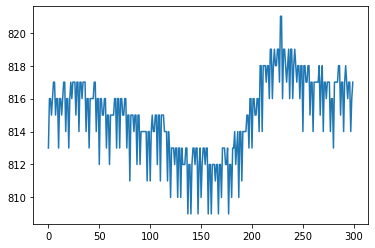

Press Enter to continue...25


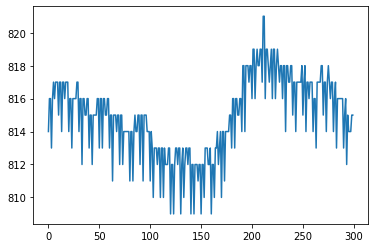

Press Enter to continue...26


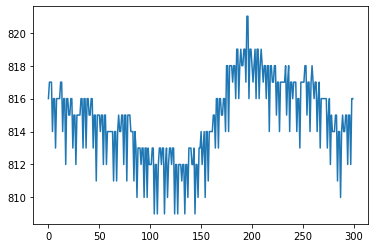

Press Enter to continue...27


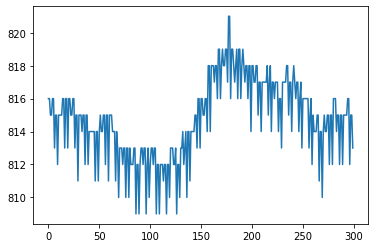

Press Enter to continue...28


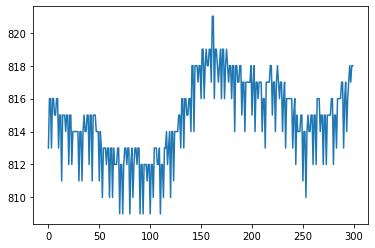

Press Enter to continue...29


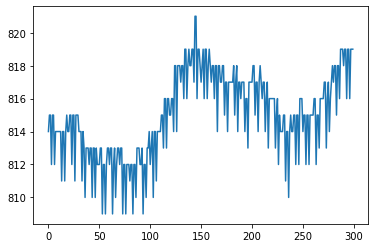

Press Enter to continue...30


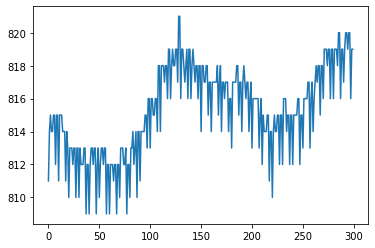

Press Enter to continue...31


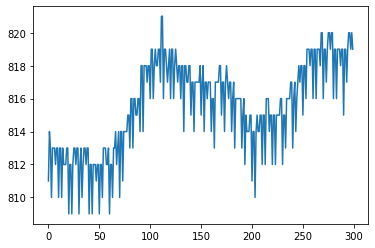

Press Enter to continue...32


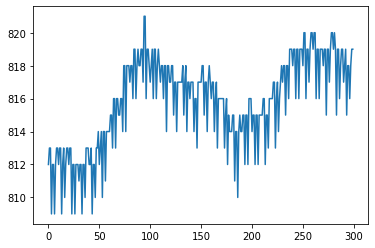

Press Enter to continue...33


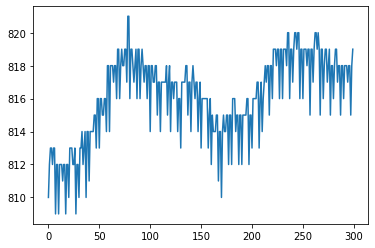

Press Enter to continue...34


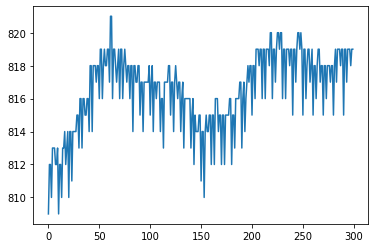

Press Enter to continue...35


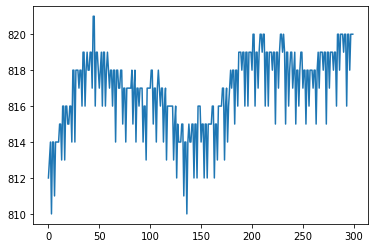

Press Enter to continue...36


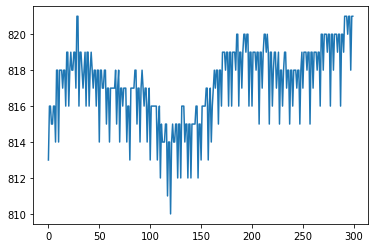

Press Enter to continue...37


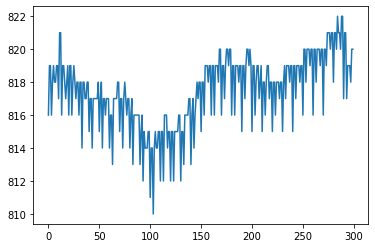

Press Enter to continue...38


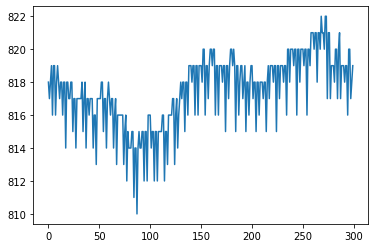

Press Enter to continue...39


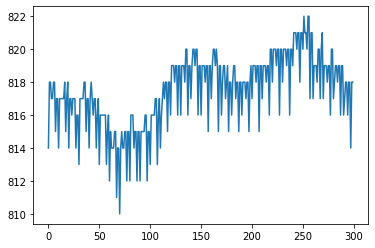

Press Enter to continue...40


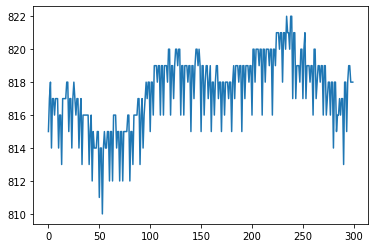

Press Enter to continue...41


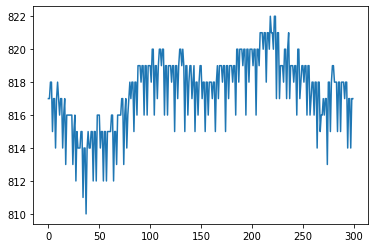

Press Enter to continue...42


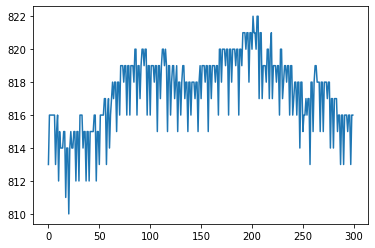

Press Enter to continue...43


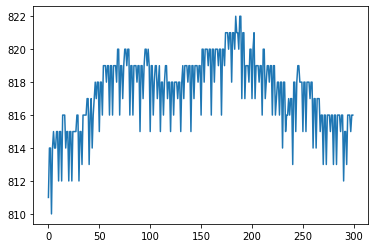

Press Enter to continue...44


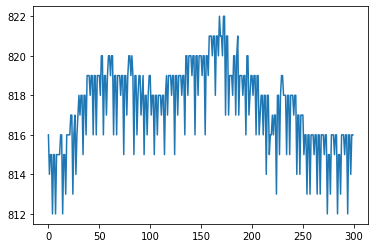

Press Enter to continue...45


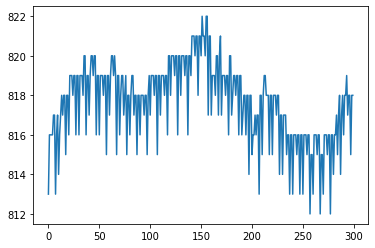

Press Enter to continue...46


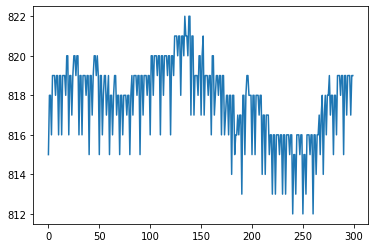

Press Enter to continue...47


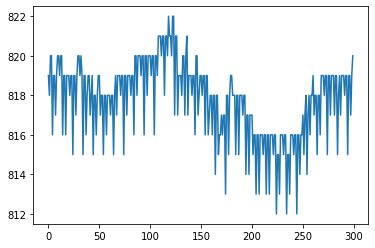

Press Enter to continue...48


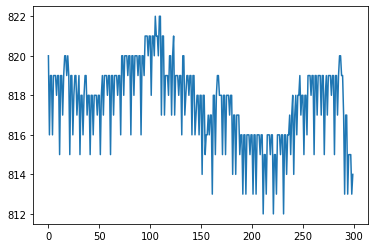

Press Enter to continue...49


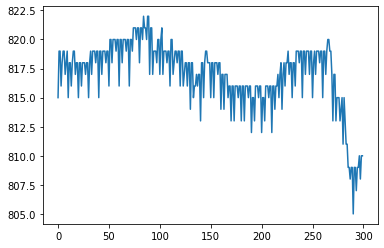

Press Enter to continue...50


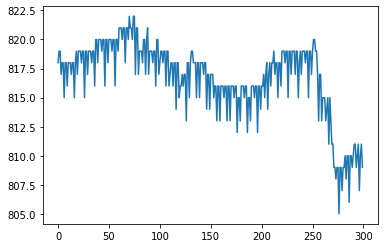

Press Enter to continue...51


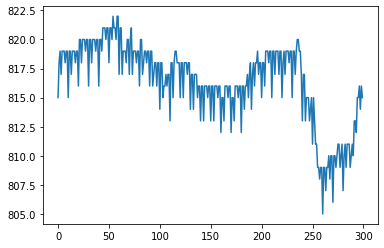

Press Enter to continue...52


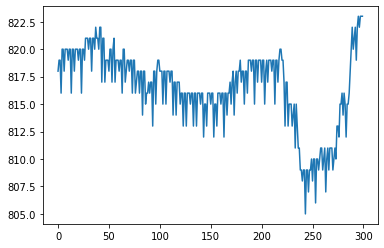

Press Enter to continue...53


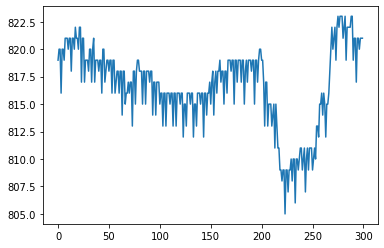

Press Enter to continue...54


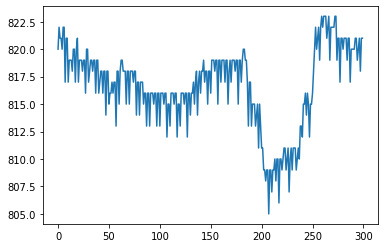

Press Enter to continue...55


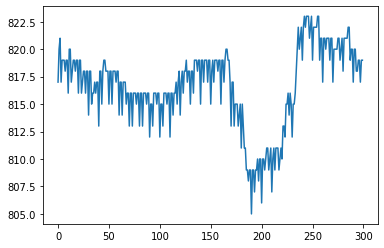

Press Enter to continue...56


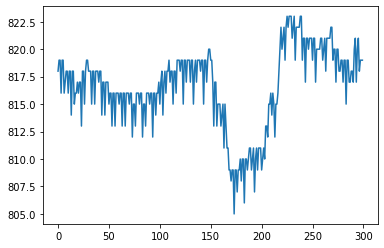

Press Enter to continue...57


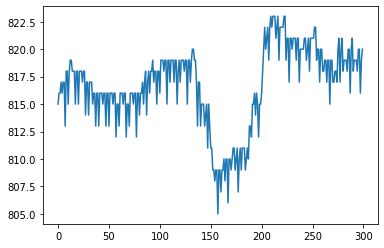

Press Enter to continue...58


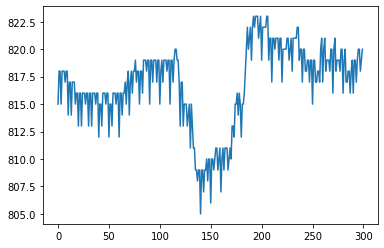

Press Enter to continue...59


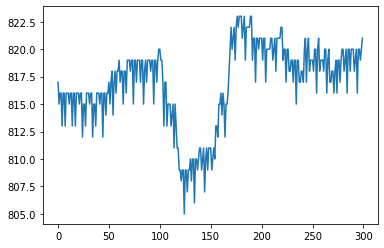

Press Enter to continue...60


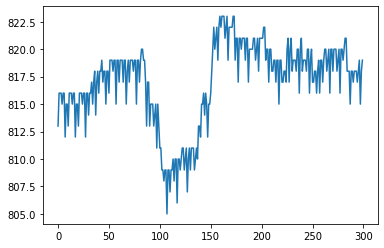

Press Enter to continue...61


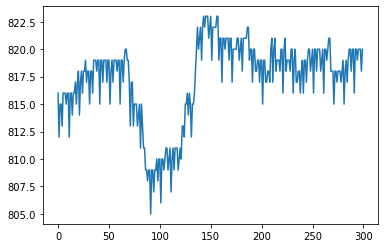

Press Enter to continue...62


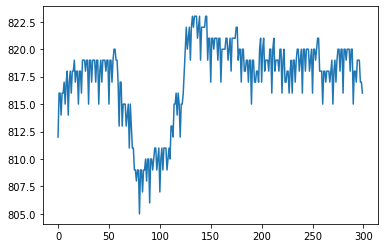

Press Enter to continue...63


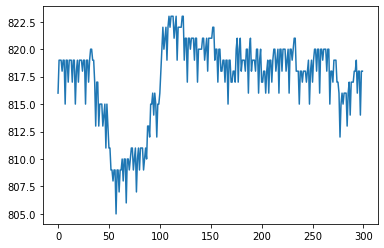

Press Enter to continue...64


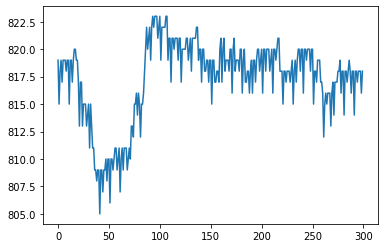

Press Enter to continue...65


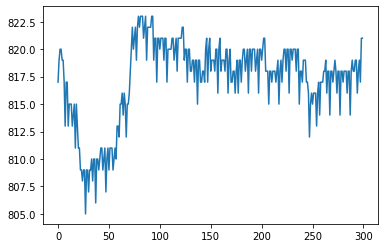

Press Enter to continue...66


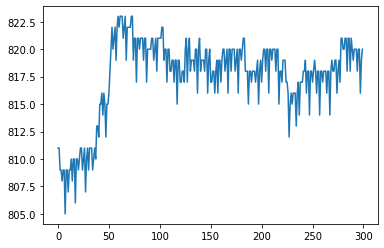

Press Enter to continue...67


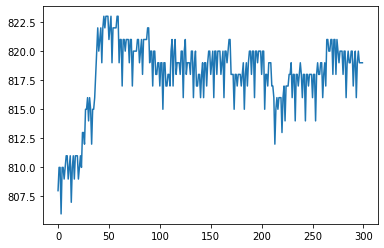

Press Enter to continue...68


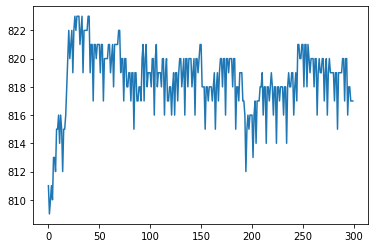

Press Enter to continue...69


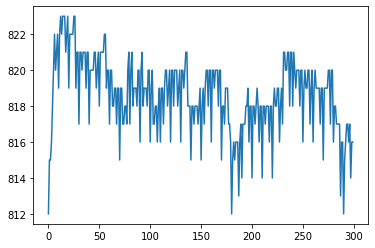

Press Enter to continue...70


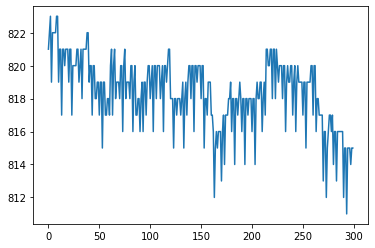

Press Enter to continue...71


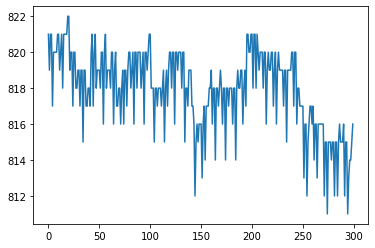

Press Enter to continue...72


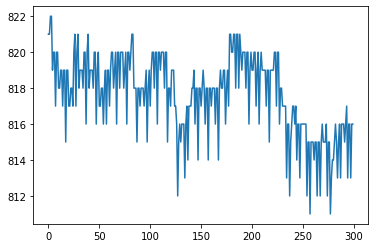

Press Enter to continue...73


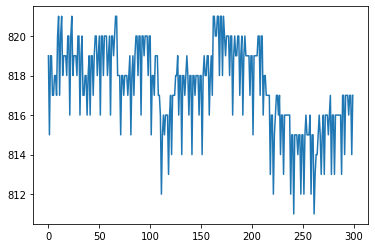

Press Enter to continue...74


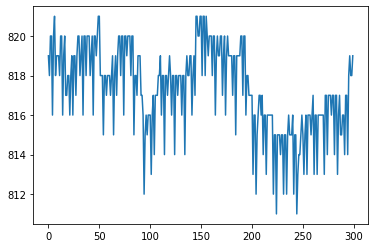

Press Enter to continue...75


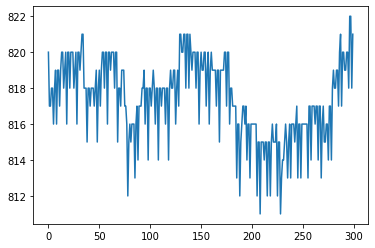

Press Enter to continue...76


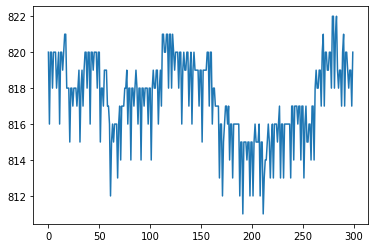

Press Enter to continue...77


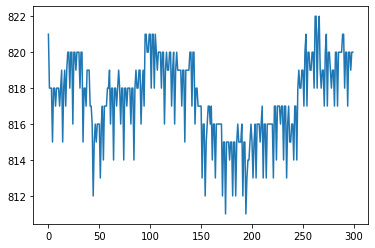

Press Enter to continue...78


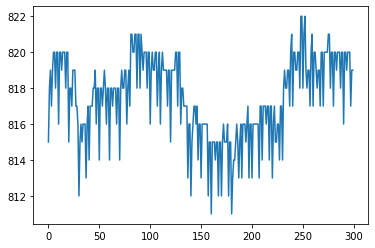

Press Enter to continue...79


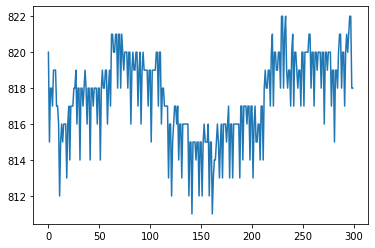

Press Enter to continue...80


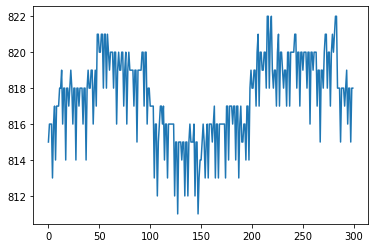

Press Enter to continue...81


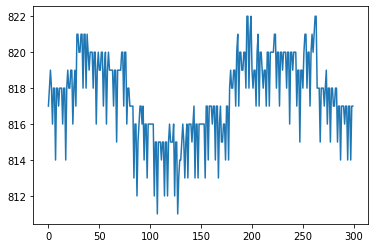

KeyboardInterrupt: Interrupted by user

In [46]:
for i in range(len(labelB)):
    x = range(0, 300)
    y = labelA.iloc[i, :-1]
    plt.plot(x,y)
    plt.show()
    input("Press Enter to continue..." + str(i))

In [32]:
labelA.iloc[0, :-1]

0      819
1      819
2      818
3      819
4      820
      ... 
295    818
296    816
297    818
298    818
299    815
Name: 0, Length: 300, dtype: object